# Latar Belakang
##### Latar belakang dari perusahaan, data yang ada dan ringkasan singkat dari pernyataan masalah

## Pernyataan Masalah
##### Masalah yang ingin diketahui dari analisis data

## Data
##### Untuk menjawab pertanyaan di atas, kita akan menganalisa data penjualan Amazon Web Services yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses (disini).

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, shapiro
from IPython.display import display, HTML


<!-- Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 14 kolom di dalam dataset hr_analytics, yaitu:

    enrollee_id : ID unik untuk tiap kandidat
    city: kode untuk kota
    city_ development _index : index perkembangan untuk kota (scaled)
    gender: jenis kelamin dari kandidat
    relevent_experience: pengalaman kerja kandidat yang relevan
    enrolled_university: tipe kelas di kuliah yang diikuti, jika ada
    education_level: pendidikan terakhir kandidat
    major_discipline : jurusan pendidikan kandidat
    experience: lama pengalaman bekerja kandidat dalam tahun
    company_size: jumlah karyawan di perusahaan tempat kandidat sedang bekerja
    company_type : tipe perusahaan tempat kandidat sedang bekerja
    lastnewjob: berapa tahun sejak kandidat bekerja di perusahaan yang sekarang
    training_hours: training yang sudah diselesaikan dalam jam
    target: 0 – tidak mencari pekerjaan baru, 1 – sedang mencari pekerjaan baru

Berikut 5 baris teratas dan terbawah dari dataset hr_analitycs. -->


Dataset ini berisi informasi terkait demografis, keuntungan, profit, kuantitas dan penjualan dari banyak produk dari AWS mulai dari tahun 2020 sampai tahun 2023. Ada - kolom di dalam dataset AWS SaaS-Sales, yaitu:

1. Row ID: ID unik untuk setiap transaksi.
2. Order ID: ID unik untuk setiap pesanan.
3. Order Date: Tanggal pemesanan.
4. Date Key: Representasi numerik dari order date (YYYYMMDD).
5. Contact Name: Nama orang yang melakukan pemensanan.
6. Country: Negara asal pemesanan.
7. City: Kota asal pemesanan.
8. Region: Wilayah tempat pemesanan.
9. Subregion: Subwilayah tempat pemesanan.
10. Customer: Nama perusahaan pemesan.
11. Customer ID: ID unik untuk setiap pelanggan.
12. Industry: Industri dari pelanggan.
13. Segment: Segmen dari pelanggan (SMB, Strategic, Enterprise, dll.).
14. Product: Produk yang dipesan.
15. License: "License Key" untuk produk.
16. Sales: Jumlah penjualan total untuk setiap transaksi.
17. Quantity: Jumlah total barang untuk setiap transaksi.
18. Discount: Diskon yang diterapkan pada transaksi.
19. Profit: Keuntungan dari transaksi.
    

Berikut 5 baris teratas dan terbawah dari dataset AWS SaaS-Sales menurut Row ID dan menurut Date Key.

In [84]:
df=pd.read_csv('SaaS-Sales.csv')
dateSorted_df = df.sort_values(by='Date Key')
display(HTML(f"<font size=6>5 teratas dan terbawah diurutkan dari Row ID</font>"))
display(df.head(),df.tail())
display(HTML(f"<font size=6>5 teratas dan terbawah diurutkan dari Date Key</font>"))
display(dateSorted_df.head(),dateSorted_df.tail())


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7980,7981,APJ-2020-103800,1/4/2020,20200104,Brian Dickens,Japan,Tokyo,APJ,JAPN,Siemens,1043,Manufacturing,SMB,Support,730VUNTJF5,16.448,2,0.2,5.5512
739,740,APJ-2020-112326,1/5/2020,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,1026,Retail,Enterprise,FinanceHub,XGQWR8K66V,11.784,3,0.2,4.2717
740,741,APJ-2020-112326,1/5/2020,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,1026,Retail,Enterprise,Marketing Suite - Gold,54J2FWJY59,272.736,3,0.2,-64.7748
741,742,APJ-2020-112326,1/5/2020,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,1026,Retail,Enterprise,ContactMatcher,K3HDHHY5YG,3.540,2,0.8,-5.4870
1759,1760,EMEA-2020-141817,1/6/2020,20200106,Ella Springer,France,Paris,EMEA,EU-WEST,Mitsubishi,1050,Manufacturing,SMB,ChatBot Plugin,PGSY1LZQ71,19.536,3,0.2,4.8840


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
5091,5092,EMEA-2023-156720,12/31/2023,20231231,Max Morgan,Russia,Moscow,EMEA,EU-EAST,Tyson Foods,1088,Consumer Products,SMB,Storage,1NXYUPA4CX,3.024,3,0.2,-0.6048
908,909,EMEA-2023-143259,12/31/2023,20231231,Katherine Dowd,United Kingdom,London,EMEA,UKIR,Morgan Stanley,1068,Finance,SMB,ContactMatcher,IHFJIL4RNB,52.776,3,0.2,19.7910
907,908,EMEA-2023-143259,12/31/2023,20231231,Katherine Dowd,United Kingdom,London,EMEA,UKIR,Morgan Stanley,1068,Finance,SMB,Site Analytics,U4EQCPO0OL,90.930,7,0.0,2.7279
1296,1297,AMER-2023-115427,12/31/2023,20231231,Justin Walker,United States,Columbia,AMER,NAMER,Aviva,1006,Finance,Strategic,ContactMatcher,YIM32OGSAB,13.904,2,0.2,4.5188
906,907,EMEA-2023-143259,12/31/2023,20231231,Katherine Dowd,United Kingdom,London,EMEA,UKIR,Morgan Stanley,1068,Finance,SMB,Marketing Suite,R82G8HW9LE,323.136,4,0.2,12.1176


## Data Understanding and Cleaning
##### Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil.

##### Pertama, informasi umum dari dataset AWS SaaS-Sales.

1. Melihat bentuk dari dataset AWS SaaS-Sales

In [85]:
print(f'(baris, kolom) {df.shape}')
df.info()

(baris, kolom) (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Pr

2. Melihat statistika deskriptif dari dataframe AWS SaaS-Sales

In [86]:
display(
    # Statistika deskriptif dataframe
    df.describe(), 
    # Distribusi dan karakteristik dataframe
    df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


2. Melihat jumlah entry unik dari dataset.

In [87]:
# Menetapkan bahwa kolum maksimal adalah tak terbatas
pd.set_option('display.max_colwidth', None)
# Menunjukkan data unik di tiap kolom
listItem = []
for col in df.columns :
    uniqueSamples = sorted(df[col].unique(), key=lambda x: (float(x) if str(x).replace('.', '', 1).isdigit() else x))
    listItem.append( [col, df[col].nunique(), uniqueSamples])

    listItem[-1][2] = sorted(listItem[-1][2], key=lambda x: (float(x) if str(x).replace('.', '', 1).isdigit() else x))

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[AMER-2020-100090, AMER-2020-100279, AMER-2020-100363, AMER-2020-100762, AMER-2020-100860, AMER-2020-100867, AMER-2020-101175, AMER-2020-101392, AMER-2020-101462, AMER-2020-101560, AMER-2020-101931, AMER-2020-102071, AMER-2020-102085, AMER-2020-102295, AMER-2020-102330, AMER-2020-102652, AMER-2020-103310, AMER-2020-103338, AMER-2020-103373, AMER-2020-103401, AMER-2020-103660, AMER-2020-103702, AMER-2020-103940, AMER-2020-104178, AMER-2020-104269, AMER-2020-104563, AMER-2020-104780, AMER-2020-104808, AMER-2020-104976, AMER-2020-105137, AMER-2020-105172, AMER-2020-105249, AMER-2020-105270, AMER-2020-105648, AMER-2020-105984, AMER-2020-106264, AMER-2020-106334, AMER-2020-106376, AMER-2020-106439, AMER-2020-106572, AMER-2020-106726, AMER-2020-107139, AMER-2020-107181, AMER-2020-107398, AMER-2020-107594, AMER-2020-107699, AMER-2020-107755, AMER-2020-107818, AMER-2020-108189, AMER-2020-108609, AMER-2020-108861, AMER-2020-108903, AMER-2020-109036, AMER-2020-109134, AMER-2020-109218, AMER-2020-109232, AMER-2020-109302, AMER-2020-109456, AMER-2020-109890, AMER-2020-109897, AMER-2020-109918, AMER-2020-110072, AMER-2020-110184, AMER-2020-110527, AMER-2020-110674, AMER-2020-110786, AMER-2020-110849, AMER-2020-111003, AMER-2020-111059, AMER-2020-111192, AMER-2020-111360, AMER-2020-111857, AMER-2020-111871, AMER-2020-111962, AMER-2020-112291, AMER-2020-112795, AMER-2020-112837, AMER-2020-112851, AMER-2020-113047, AMER-2020-113271, AMER-2020-113320, AMER-2020-113383, AMER-2020-113579, AMER-2020-113768, AMER-2020-114125, AMER-2020-114195, AMER-2020-114433, AMER-2020-114643, AMER-2020-115056, AMER-2020-115133, AMER-2020-115161, AMER-2020-115259, AMER-2020-115357, AMER-2020-115812, AMER-2020-115889, AMER-2020-115973, AMER-2020-116239, AMER-2020-116673, AMER-2020-116785, AMER-2020-116834, ...]"
2,Order Date,1237,"[1/1/2023, 1/10/2020, 1/10/2021, 1/10/2022, 1/10/2023, 1/11/2020, 1/11/2022, 1/12/2020, 1/12/2021, 1/13/2021, 1/13/2023, 1/14/2020, 1/14/2022, 1/14/2023, 1/15/2020, 1/15/2022, 1/15/2023, 1/16/2020, 1/16/2022, 1/16/2023, 1/17/2020, 1/17/2021, 1/17/2022, 1/17/2023, 1/19/2020, 1/19/2021, 1/2/2021, 1/2/2022, 1/2/2023, 1/20/2020, 1/20/2023, 1/21/2020, 1/21/2022, 1/21/2023, 1/22/2020, 1/22/2022, 1/22/2023, 1/23/2021, 1/23/2022, 1/23/2023, 1/24/2020, 1/24/2021, 1/24/2022, 1/24/2023, 1/25/2022, 1/25/2023, 1/26/2021, 1/27/2020, 1/27/2021, 1/27/2023, 1/28/2020, 1/28/2021, 1/28/2022, 1/28/2023, 1/29/2020, 1/29/2023, 1/3/2021, 1/3/2022, 1/3/2023, 1/30/2021, 1/30/2022, 1/30/2023, 1/31/2020, 1/31/2021, 1/31/2022, 1/31/2023, 1/4/2020, 1/4/2021, 1/4/2022, 1/4/2023, 1/5/2020, 1/5/2021, 1/5/2022, 1/6/2020, 1/6/2021, 1/7/2020, 1/7/2022, 1/7/2023, 1/8/2020, 1/8/2022, 1/8/2023, 1/9/2021, 1/9/2022, 1/9/2023, 10/1/2020, 10/1/2021, 10/1/2022, 10/1/2023, 10/10/2020, 10/10/2021, 10/10/2022, 10/10/2023, 10/11/2020, 10/11/2021, 10/11/2022, 10/11/2023, 10/12/2020, 10/12/2021, 10/12/2022, 10/13/2020, ...]"
3,Date Key,1237,"[20200104, 20200105, 20200106, 20200107, 20200108, 20200110, 20200111, 20200112, 20200114, 20200115, 20200116, 20200117, 20200119, 20200120, 20200121, 20200122, 20200124, 20200127, 20200128, 20200129, 20200131, 20200201, 20200202, 20200203, 20200204, 20200205, 20200207, 20200208, 20200209, 20200212, 20200213, 20200215, 20200216, 20200217, 20200218, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200228, 20200301, 20200302, 20200303, 20200304, 20200305, 20200307, 20200310, 20200311, 20200314, 20200315, 20200316, 20200317, 20200318, 20200319, 20200321, 20200322, 2020032

In [88]:
columnList = df.columns.tolist()

for col in columnList:
    display(df[col].value_counts())

Row ID
1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: count, Length: 9994, dtype: int64

Order ID
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
                    ..
EMEA-2022-157259     1
AMER-2023-107986     1
EMEA-2021-112508     1
APJ-2022-126844      1
AMER-2023-119914     1
Name: count, Length: 5009, dtype: int64

Order Date
9/6/2022      38
9/3/2023      36
11/11/2022    35
12/2/2023     34
12/3/2023     34
              ..
2/25/2022      1
10/26/2022     1
2/22/2020      1
10/19/2022     1
1/22/2020      1
Name: count, Length: 1237, dtype: int64

Date Key
20220906    38
20230903    36
20221111    35
20231202    34
20231203    34
            ..
20220225     1
20221026     1
20200222     1
20221019     1
20200122     1
Name: count, Length: 1237, dtype: int64

Contact Name
Leonard Kelly       37
Gordon Parr         34
Amelia Campbell     34
Tracey Dickens      34
Evan Ince           32
                    ..
Joshua Gibson        1
Brian Campbell       1
Alexander Duncan     1
Frank Ferguson       1
Sam Randall          1
Name: count, Length: 793, dtype: int64

Country
United States           2001
United Kingdom          1141
Japan                    985
France                   587
Canada                   506
Australia                492
Mexico                   469
Germany                  383
Brazil                   255
Sweden                   249
Chile                    224
Spain                    224
Finland                  184
South Africa             183
Russia                   182
India                    149
South Korea              135
Argentina                130
Ireland                  126
Belgium                  124
Italy                    110
China                    105
Philippines               96
Luxembourg                89
Saudi Arabia              82
Poland                    66
Singapore                 66
Portugal                  61
United Arab Emirates      60
Norway                    56
Ukraine                   53
Turkey                    53
Netherlands               45
Czech Republic            42
Colomb

City
London           922
New York City    740
Paris            537
Los Angeles      510
Toronto          431
                ... 
Huntsville         1
Chengdu            1
Lawrence           1
Clinton            1
Ljubljana          1
Name: count, Length: 262, dtype: int64

Region
EMEA    4219
AMER    3665
APJ     2110
Name: count, dtype: int64

Subregion
NAMER      2507
EU-WEST    1614
UKIR       1267
LATAM      1158
JAPN        985
ANZ         529
NOR         489
APAC        447
MEA         396
EU-EAST     343
IND         149
EU          110
Name: count, dtype: int64

Customer
Allianz               192
Tyson Foods           184
Ford Motor            176
Siemens               170
Comcast               161
                     ... 
Tesco                  48
Alphabet               44
Berkshire Hathaway     39
Safeway                39
Citigroup              22
Name: count, Length: 99, dtype: int64

Customer ID
1080    192
1088    184
1009    176
1043    170
1022    161
       ... 
1059     48
1053     44
1012     39
1079     39
1020     22
Name: count, Length: 99, dtype: int64

Industry
Finance              2127
Energy               1316
Tech                 1236
Manufacturing        1222
Healthcare           1049
Consumer Products    1021
Retail                972
Communications        593
Transportation        351
Misc                  107
Name: count, dtype: int64

Segment
SMB           5191
Strategic     3020
Enterprise    1783
Name: count, dtype: int64

Product
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 889
Marketing Suite - Gold         846
ChatBot Plugin                 796
Data Smasher                   775
OneView                        466
SaaS Connector Pack - Gold     254
Marketing Suite                228
Storage                        217
Big Ol Database                115
Alchemy                         68
Name: count, dtype: int64

License
16GRM07R1K    1
Y8TULY7XSD    1
OL8LUB2422    1
4YLZ318U2E    1
NVAYXZ2NB5    1
             ..
4QCWULG76F    1
OZFTJG725G    1
R2G2Z3TP04    1
415425LE8Q    1
3NTBV9B3PS    1
Name: count, Length: 9994, dtype: int64

Sales
12.960     56
19.440     39
15.552     39
25.920     36
10.368     36
           ..
4.240       1
319.960     1
646.740     1
81.940      1
243.160     1
Name: count, Length: 5825, dtype: int64

Quantity
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

Profit
0.0000     65
6.2208     43
9.3312     38
5.4432     32
3.6288     32
           ..
83.2508     1
16.1096     1
7.1988      1
1.6510      1
72.9480     1
Name: count, Length: 7287, dtype: int64

Display diatas menunjukkan bahwa terdapat 2 kolom yang memiliki data unik di setiap baris, yaitu `RowID` dan `License`.

3. Missing Value

In [89]:
# Melihat missing value di masing-masing column
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<Axes: >

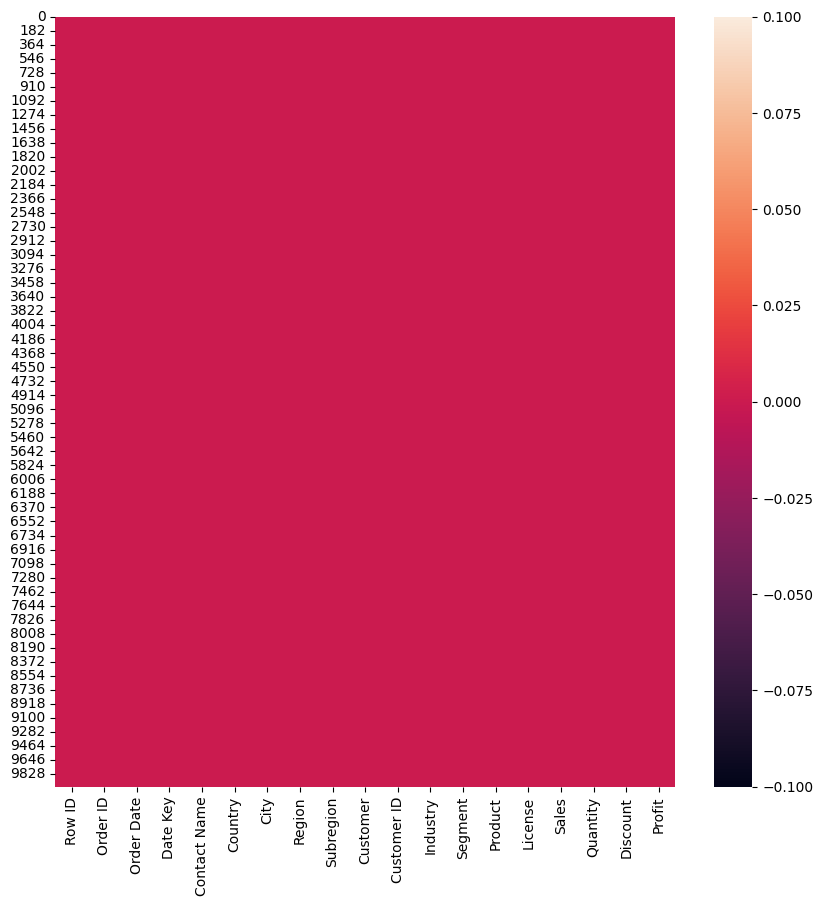

In [90]:
# Melihat sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Dari pengamatan diatas, dapat dilihat bahwa tidak terdapat missing value pada dataset ini.

4. Outlier

Kolom yang dapat dilakukan analisis adalah kolom Sales, Profit, Quantity dan Discount

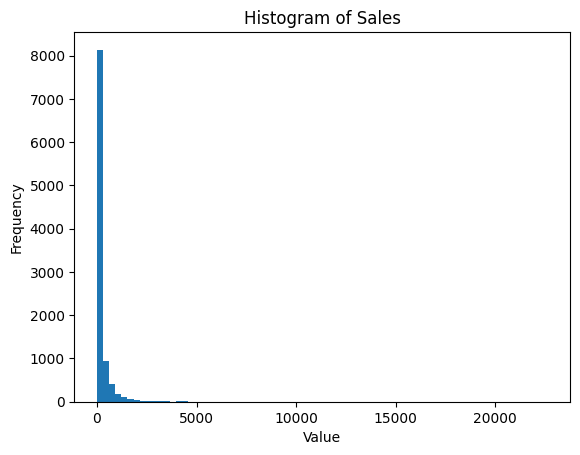

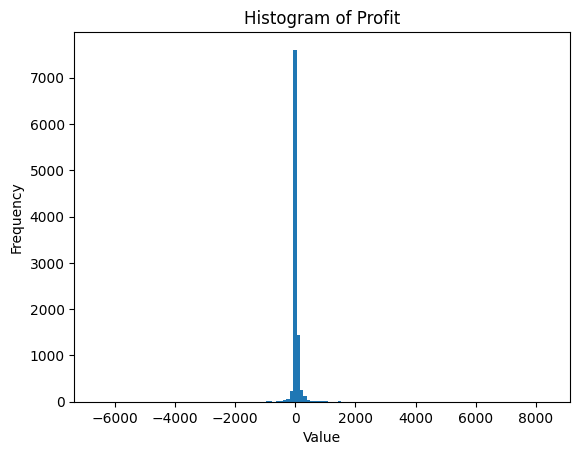

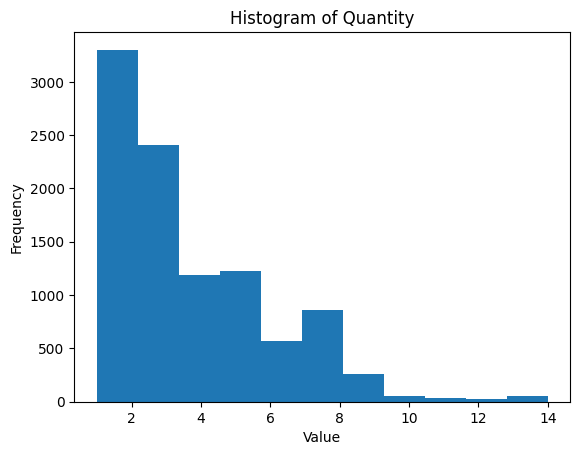

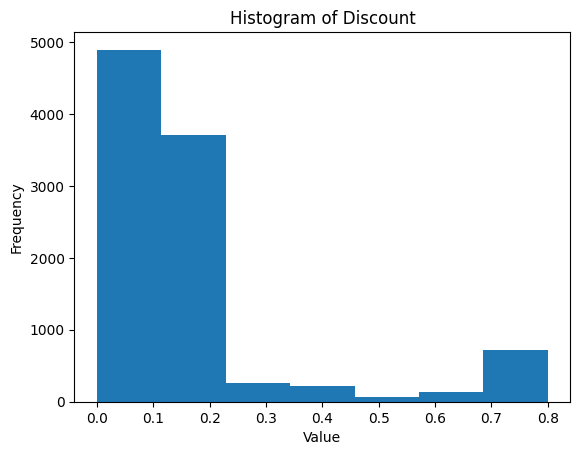

In [91]:
# Inspeksi Visual Histogram
columnList = [df['Sales'], df['Profit'], df['Quantity'], df['Discount']]
ColumnNames = ['Sales', 'Profit', 'Quantity', 'Discount']

for col, name in zip(columnList, ColumnNames):
    plt.hist(col, bins=int((max(col) - min(col)) / (10.5 * np.std(col) / len(col)**(1/3))))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {name}')
    plt.show()

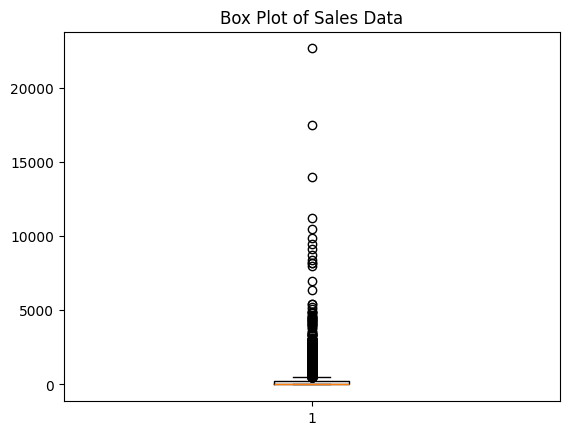

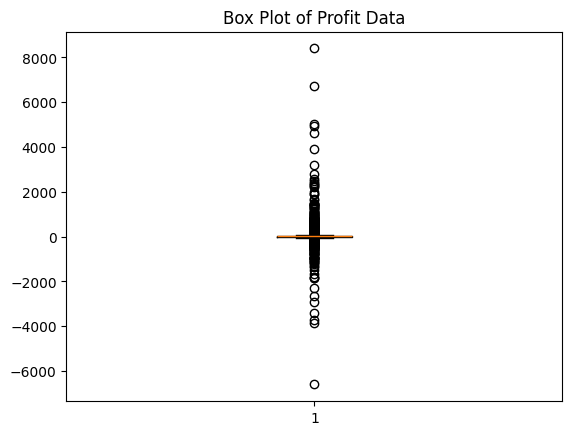

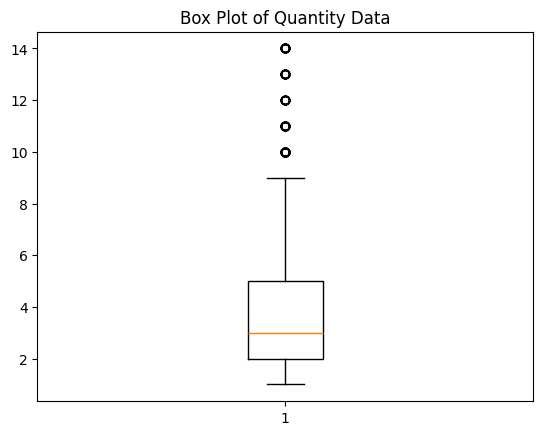

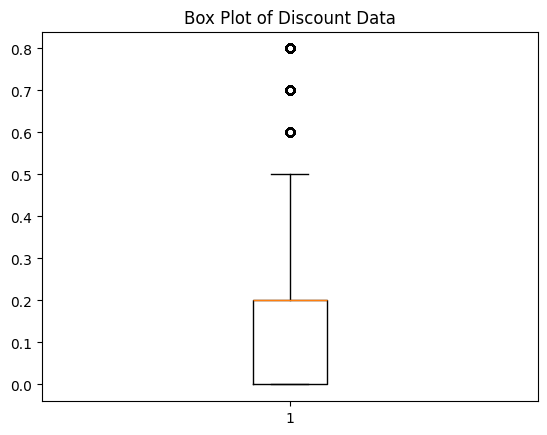

In [92]:
# Inspeksi Visual Boxplot
for col, name in zip(columnList, ColumnNames):
    plt.boxplot(col)
    plt.title(f'Box Plot of {name} Data')
    plt.show()
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_threshold_boxplot = q1 - 1.5 * iqr
    upper_threshold_boxplot = q3 + 1.5 * iqr
    outliers_boxplot = df[(col < lower_threshold_boxplot) | (col > upper_threshold_boxplot)]



Dari boxplot diatas walaupun Sales dan Profit memiliki banyak outlier, namun karena angka outlier masih dalam nilai normal dari nilai penjualan dan keuntungan dan mungkin memberikan insight maka tidak ada outlier yang perlu dihapus atau diabaikan pada perhitungan lanjut.

5. Membuat kolom `datetime` dari `Date Key`

Diperlukan kolom datetime agar data bisa di analisis menggunakan python

In [93]:
df['datetime'] = pd.to_datetime(df['Date Key'], format = '%Y%m%d')
df['datetime']

0      2022-11-09
1      2022-11-09
2      2022-06-13
3      2021-10-11
4      2021-10-11
          ...    
9989   2020-01-22
9990   2023-02-27
9991   2023-02-27
9992   2023-02-27
9993   2023-05-05
Name: datetime, Length: 9994, dtype: datetime64[ns]

Secara umum, kita bisa melihat bahwa:
* Dataset AWS SaaS-Sales memiliki 19 kolom dan 9.994 baris,
* tidak ada data yang kosong atau diwakili dengan data NaN maka tidak perlu dilakukan "missing data imputation" atau penghapusan baris,
* tidak ada outlier yang perlu di hapus karena masih masuk range yang masuk akal untuk setiap kolom,
* terdapat dua kolom, yaitu `RowID` dan `License` yang berisikan id unik untuk setiap baris, sehingga tidak relevan dalam analisis dan bisa dihapus atau dihiraukan saja,
* kolom `Order Date` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya berisikan data datetime yang sudah di buatkan kolom datetime baru,
* beberapa data mungkin dapat dilakukan "binning" atau "bucketing" contohnya seperti data kolom diskon jika diperlukan dalam analisis.

## Data Analysis

##### Setelah melakukan tahap `Data Cleaning`. Sekarang, data siap untuk dianalisis untuk mencari tahu bagaimana pengaruh profit dengan 

1. Statistika Deskriptif

Untuk melakukan analisis lebih lanjut, perlu melihat lebih dahulu statistika deskriptif dari code berikut.

In [94]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Selanjutnya dilakukan pengujian `normaltest` untuk melihat apakah distribusi data normal atau tidak.

In [95]:
testColumns = ['Sales', 'Quantity', 'Discount', 'Profit']

for column in testColumns:
    stat, p = normaltest(df[column])
    print(f'{column}: Statistics={stat:.3f}, p-value={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print(f'{column} is normally distributed (fail to reject H0)')
    else:
        print(f'{column} is not normally distributed (reject H0)')

Sales: Statistics=18033.308, p-value=0.000
Sales is not normally distributed (reject H0)
Quantity: Statistics=2148.018, p-value=0.000
Quantity is not normally distributed (reject H0)
Discount: Statistics=2977.822, p-value=0.000
Discount is not normally distributed (reject H0)
Profit: Statistics=14363.736, p-value=0.000
Profit is not normally distributed (reject H0)


Karena keempat data memiliki distribusi yang tidak normal, maka harus menggunakan uji untuk data `non-parametrik`.

In [96]:
dfTest = df[['Sales', 'Quantity', 'Discount', 'Profit']]

spearmanCorrSP = dfTest.corr(method='spearman').iloc[3, 0]
spearmanCorrQP = dfTest.corr(method='spearman').iloc[3, 1]
spearmanCorrDP = dfTest.corr(method='spearman').iloc[3, 2]
print("Spearman's correlation coefficient antara Sales dan Profit:", spearmanCorrSP)
print("Spearman's correlation coefficient antara Quantity dan Profit:", spearmanCorrQP)
print("Spearman's correlation coefficient antara Discount dan Profit:", spearmanCorrDP)

Spearman's correlation coefficient antara Sales dan Profit: 0.5184066611400607
Spearman's correlation coefficient antara Sales dan Profit: 0.2344912031227869
Spearman's correlation coefficient antara Sales dan Profit: -0.5433501822306211


Berdasarkan hasil diatas, 
* antara Sales dan Profit memiliki hubungan yang moderat dan positif,
* antara Quantity dan Profit memiliki hubungan yang lemah dan positif,
* antara Discount dan Profit memiliki hubungan yang moderat dan negatif.

Selanjutnya akan dilakukan inspeksi visual dari perbandingan trend antara Profit dan Sales, Quantity dan Discount

C:\Users\adamg\AppData\Local\Temp\ipykernel_12192\1012940120.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfDateSorted = dfDateSorted.resample('M').sum()


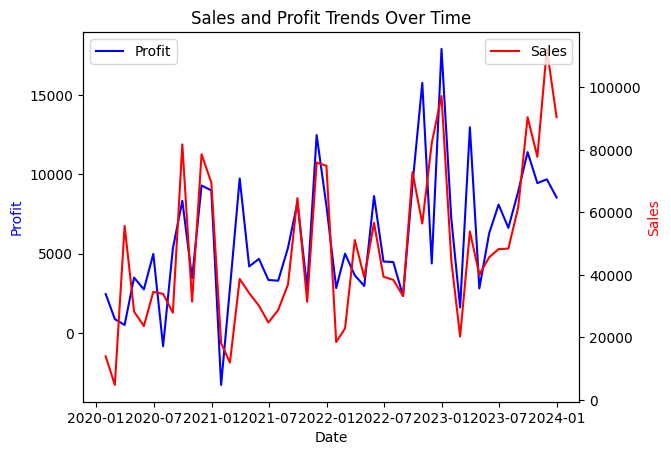

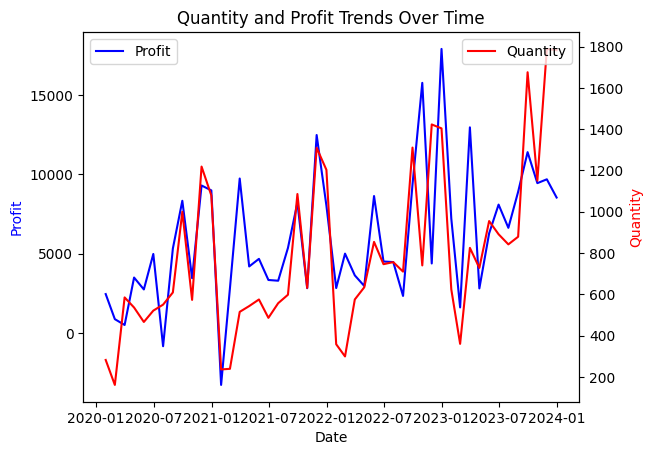

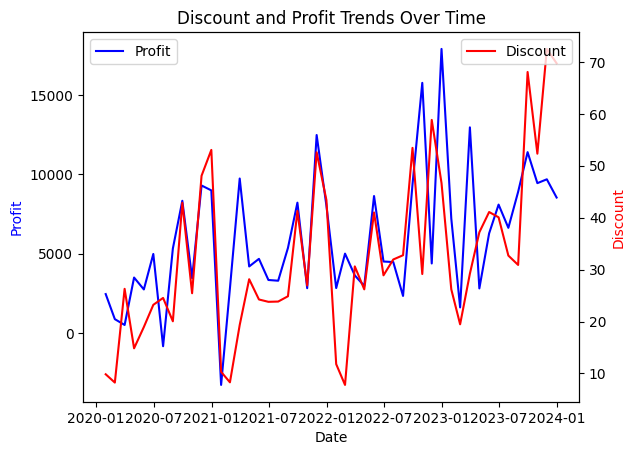

In [99]:
dfDateTest = df[['Sales', 'Quantity', 'Discount', 'Profit', 'datetime']]
dfDateSorted = dfDateTest.sort_values('datetime')

dfDateSorted.set_index('datetime', inplace=True)

dfDateSorted = dfDateSorted.resample('M').sum()

compList = [dfDateSorted['Sales'], dfDateSorted['Quantity'], dfDateSorted['Discount']]
compNames = ['Sales', 'Quantity', 'Discount']

for col, name in zip(compList, compNames):
    fig, ax1 = plt.subplots()
    
    ax1.plot(dfDateSorted.index, dfDateSorted['Profit'], color='b', label='Profit')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Profit', color='b')
    
    ax2 = ax1.twinx()
    ax2.plot(dfDateSorted.index, col, color='r', label=name)
    ax2.set_ylabel(name, color='r')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f'{name} and Profit Trends Over Time')

    plt.show()

Setelah melihat trend diatas, sekarang bisa menulis kode untuk melihat profit paling rendah dari kolom `subregion`.

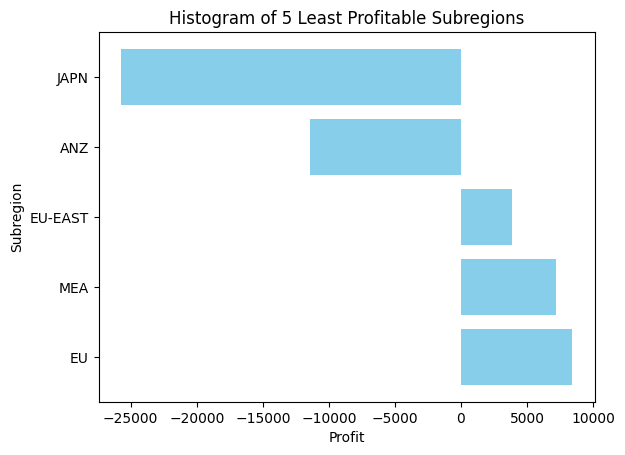

In [105]:
subregionProfit = df.groupby('Subregion')['Profit'].sum()
leastProfitableSubregion = subregionProfit.nsmallest(5)

plt.barh(leastProfitableSubregion.index, leastProfitableSubregion.values, color='skyblue')
plt.xlabel('Profit')
plt.ylabel('Subregion')
plt.title('Histogram of 5 Least Profitable Subregions')
plt.gca().invert_yaxis()  # Invert y-axis to display the least profitable subregions at the top
plt.show()

Dari grafik diatas terlihat ada 2 `Subregion` yang memiliki profit negatif, yaitu ANZ dan JAPN. Lalu dilakukan analisis terhadap profit dari kedua `Subregion` tersebut.

        a. ANZ

Pertama, dilakukan uji korelasi antara Profit dan kolom lainnya

In [107]:
dfFiltered = df[df['Subregion'].isin(['ANZ'])]
dfTest = dfFiltered[['Sales', 'Quantity', 'Discount', 'Profit']]

spearmanCorrSP = dfTest.corr(method='spearman').iloc[3, 0]
spearmanCorrQP = dfTest.corr(method='spearman').iloc[3, 1]
spearmanCorrDP = dfTest.corr(method='spearman').iloc[3, 2]
print("Spearman's correlation coefficient antara Sales dan Profit:", spearmanCorrSP)
print("Spearman's correlation coefficient antara Quantity dan Profit:", spearmanCorrQP)
print("Spearman's correlation coefficient antara Discount dan Profit:", spearmanCorrDP)

Spearman's correlation coefficient antara Sales dan Profit: 0.07681952668897771
Spearman's correlation coefficient antara Quantity dan Profit: 0.03904139210536947
Spearman's correlation coefficient antara Discount dan Profit: -0.7205467761752813


Berdasarkan hasil diatas, 
* antara Sales dan Profit memiliki hubungan yang sangat lemah dan positif,
* antara Quantity dan Profit memiliki hubungan yang moderat dan positif,
* antara Discount dan Profit memiliki hubungan yang kuat dan negatif.

C:\Users\adamg\AppData\Local\Temp\ipykernel_12192\995865557.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfDateSorted = dfDateSorted.resample('M').sum()


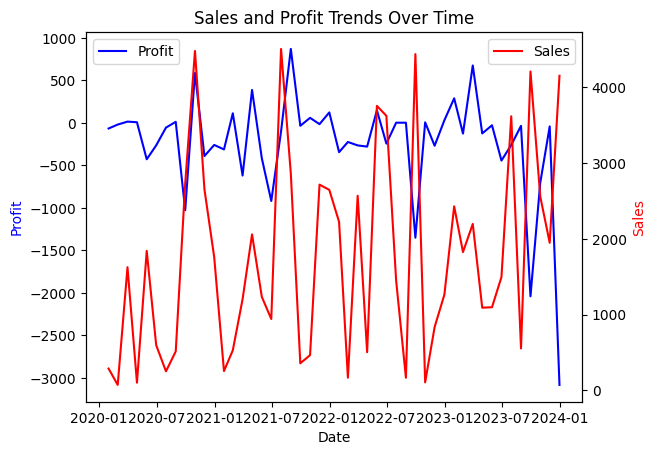

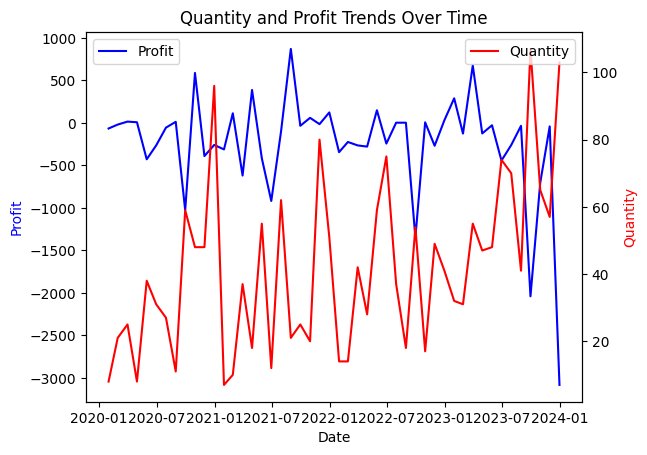

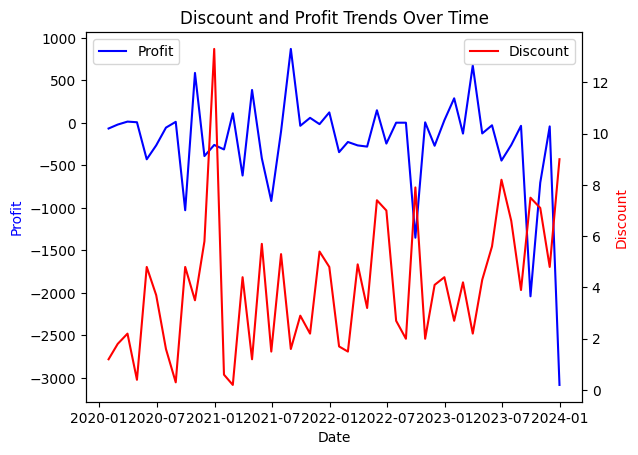

In [101]:
dfFiltered = df[df['Subregion'].isin(['ANZ'])]
dfDateTest = dfFiltered[['Sales', 'Quantity', 'Discount', 'Profit', 'datetime']]
dfDateSorted = dfDateTest.sort_values('datetime')

dfDateSorted.set_index('datetime', inplace=True)

dfDateSorted = dfDateSorted.resample('M').sum()

compList = [dfDateSorted['Sales'], dfDateSorted['Quantity'], dfDateSorted['Discount']]
compNames = ['Sales', 'Quantity', 'Discount']

for col, name in zip(compList, compNames):
    fig, ax1 = plt.subplots()
    
    ax1.plot(dfDateSorted.index, dfDateSorted['Profit'], color='b', label='Profit')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Profit', color='b')
    
    ax2 = ax1.twinx()
    ax2.plot(dfDateSorted.index, col, color='r', label=name)
    ax2.set_ylabel(name, color='r')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f'{name} and Profit Trends Over Time')

    plt.show()

Selanjutnya untuk menampilkan Profit paling rendah dari `Product` yang disediakan AWS di `Subregion` ANZ

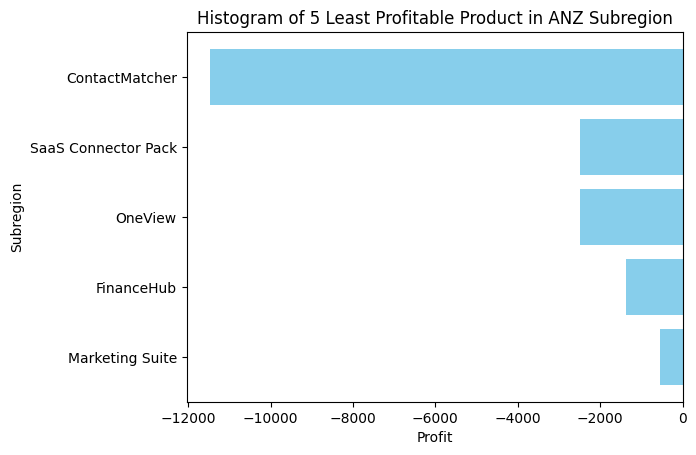

In [113]:
dfFiltered = df[df['Subregion'].isin(['ANZ'])]
productProfit = dfFiltered.groupby('Product')['Profit'].sum()
leastProfitableProduct = productProfit.nsmallest(5)

plt.barh(leastProfitableProduct.index, leastProfitableProduct.values, color='skyblue')
plt.xlabel('Profit')
plt.ylabel('Subregion')
plt.title('Histogram of 5 Least Profitable Product in ANZ Subregion')
plt.gca().invert_yaxis()  # Invert y-axis to display the least profitable subregions at the top
plt.show()

Seperti yang dilihat di grafik diatas, ContactMatcher di ANZ memiliki kerugian yang cukup tinggi.

        b. JAPN

In [108]:
dfFiltered = df[df['Subregion'].isin(['JAPN'])]
dfTest = dfFiltered[['Sales', 'Quantity', 'Discount', 'Profit']]

spearmanCorrSP = dfTest.corr(method='spearman').iloc[3, 0]
spearmanCorrQP = dfTest.corr(method='spearman').iloc[3, 1]
spearmanCorrDP = dfTest.corr(method='spearman').iloc[3, 2]
print("Spearman's correlation coefficient antara Sales dan Profit:", spearmanCorrSP)
print("Spearman's correlation coefficient antara Quantity dan Profit:", spearmanCorrQP)
print("Spearman's correlation coefficient antara Discount dan Profit:", spearmanCorrDP)

Spearman's correlation coefficient antara Sales dan Profit: 0.027789193032885524
Spearman's correlation coefficient antara Quantity dan Profit: 0.0004086322924666264
Spearman's correlation coefficient antara Discount dan Profit: -0.7028090899042733


Berdasarkan hasil diatas, 
* antara Sales dan Profit memiliki hubungan yang sangat lemah dan positif,
* antara Quantity dan Profit tidak memiliki hubungan yang berarti,
* antara Discount dan Profit memiliki hubungan yang kuat dan negatif.

C:\Users\adamg\AppData\Local\Temp\ipykernel_12192\618490977.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfDateSorted = dfDateSorted.resample('M').sum()


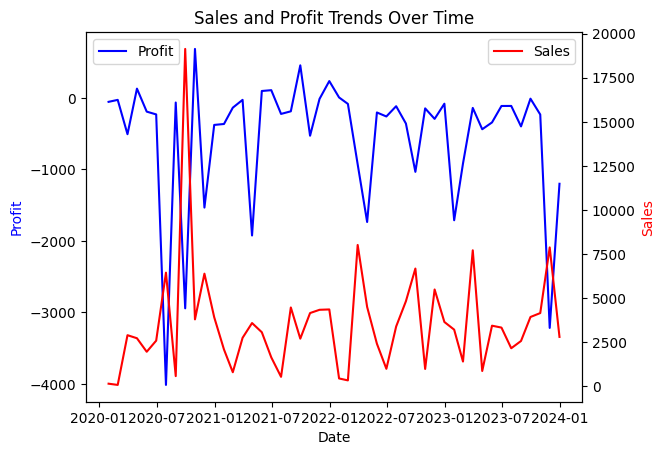

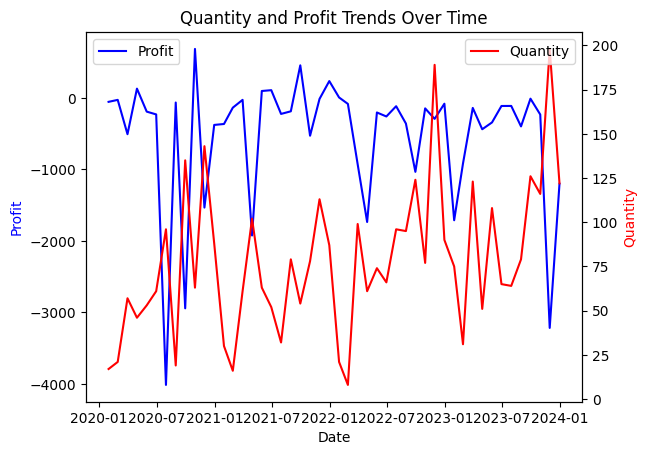

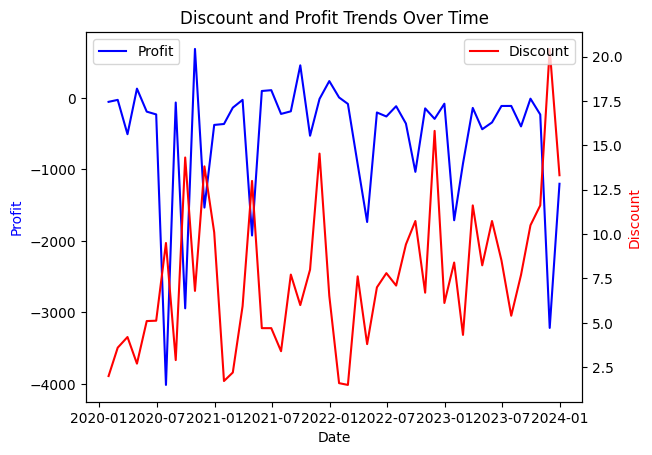

In [102]:
dfFiltered = df[df['Subregion'].isin(['JAPN'])]
dfDateTest = dfFiltered[['Sales', 'Quantity', 'Discount', 'Profit', 'datetime']]
dfDateSorted = dfDateTest.sort_values('datetime')

dfDateSorted.set_index('datetime', inplace=True)

dfDateSorted = dfDateSorted.resample('M').sum()

compList = [dfDateSorted['Sales'], dfDateSorted['Quantity'], dfDateSorted['Discount']]
compNames = ['Sales', 'Quantity', 'Discount']

for col, name in zip(compList, compNames):
    fig, ax1 = plt.subplots()
    
    ax1.plot(dfDateSorted.index, dfDateSorted['Profit'], color='b', label='Profit')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Profit', color='b')
    
    ax2 = ax1.twinx()
    ax2.plot(dfDateSorted.index, col, color='r', label=name)
    ax2.set_ylabel(name, color='r')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(f'{name} and Profit Trends Over Time')

    plt.show()

Selanjutnya untuk menampilkan Profit paling rendah dari `Product` yang disediakan AWS di `Subregion` JAPN

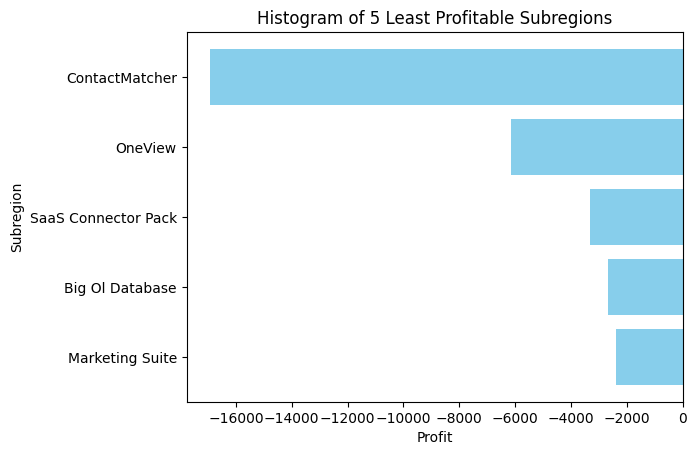

In [112]:
dfFiltered = df[df['Subregion'].isin(['JAPN'])]
productProfit = dfFiltered.groupby('Product')['Profit'].sum()
leastProfitableProduct = productProfit.nsmallest(5)

plt.barh(leastProfitableProduct.index, leastProfitableProduct.values, color='skyblue')
plt.xlabel('Profit')
plt.ylabel('Subregion')
plt.title('Histogram of 5 Least Profitable Subregions')
plt.gca().invert_yaxis()  # Invert y-axis to display the least profitable subregions at the top
plt.show()

Seperti yang dilihat di grafik diatas, ContactMatcher di JAPN memiliki kerugian yang cukup tinggi seperti di ANZ.

Export dataframe ke CSV untuk analisis dan visualisasi lanjut di Tableau

In [ ]:
df.to_csv('AWS SaaS-Sales.csv')